# Programming Assignment 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set all the parameters to be used later

# Network structure
sizes = [785, 64, 10]

# Meta parameters
eta = 1e-2  # learning rate
mu = 0.9  # momentum parameter
minibatch_size = 1024
capture_interval = 10

# Stopping criteria
epoch_min, epoch_max = 10, 10

In [3]:
# Define some convenience functions
import os
from toynn.train import train


# Train a network without tricks
from toynn.network import NaiveNetwork
def naive_train(sizes):
    return train(
        NaiveNetwork(sizes), dss,
        update_params=dict(eta=eta),
        epoch_min=epoch_min, epoch_max=epoch_max
    )

# Train a network with tricks
from toynn.network import TrickNetwork
def trick_train(sizes):
    return train(
        TrickNetwork(sizes), dss,
        update_params=dict(eta=eta, mu=mu),
        minibatch_size=minibatch_size,
        capture_interval=capture_interval,
        epoch_min=epoch_min, epoch_max=epoch_max
    )

# Report training result
def report(result, title):
    # Make sure the `figs` directory exists
    os.makedirs('figs', exist_ok=True)
    for quantity in ['loss', 'accuracy']:
        result.plot_history(quantity)
        plt.title(title.capitalize())
        plt.savefig('figs/{}_{}.pdf'.format(title, quantity))

In [4]:
# Read the MNIST data sets
from toynn.data import read_data_sets
dss = read_data_sets()
print('Training set size:', dss.training.size)
print('Validation set size:', dss.validation.size)
print('Test set size:', dss.test.size)

Training set size: 50000
Validation set size: 10000
Test set size: 10000


## Classification

### Checking Gradients

### Gradient Descent

In [5]:
%%time
result_naive = naive_train(sizes)

CPU times: user 21.3 s, sys: 5.15 s, total: 26.4 s
Wall time: 16 s


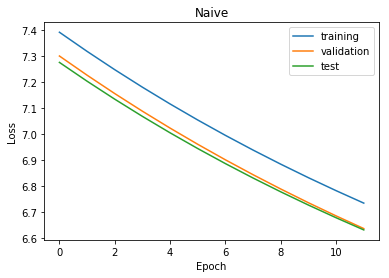

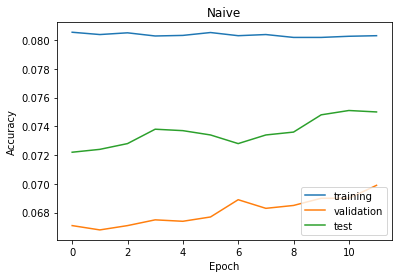

In [6]:
report(result_naive, 'Naive')

## Tricks of the Trade

In [7]:
%%time
result_trick = trick_train(sizes)

CPU times: user 51.2 s, sys: 8.23 s, total: 59.4 s
Wall time: 34.2 s


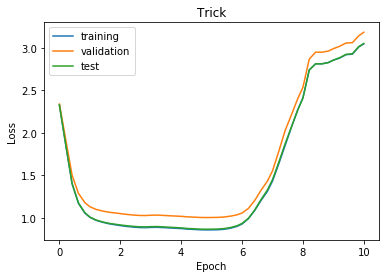

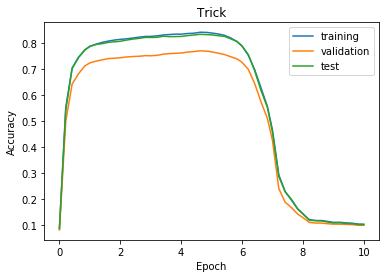

In [8]:
report(result_trick, 'Trick')

## Network Topology

### Number of Hidden Units

In [9]:
%%time
sizes_narrow = sizes.copy()
sizes_narrow[1] /= 2
result_narrow = trick_train(sizes_narrow)

/Users/qobilidop/Desktop/CSE-253-PA/2/toynn/layer.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.w = np.empty((self.prev.size, size))


CPU times: user 32.1 s, sys: 6.1 s, total: 38.2 s
Wall time: 21.3 s


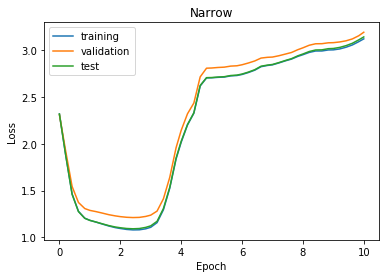

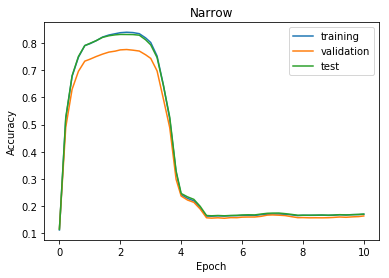

In [10]:
report(result_narrow, 'Narrow')

In [11]:
%%time
sizes_wide = sizes.copy()
sizes_wide[1] *= 2
result_wide = trick_train(sizes_wide)

CPU times: user 1min 21s, sys: 12 s, total: 1min 33s
Wall time: 52.7 s


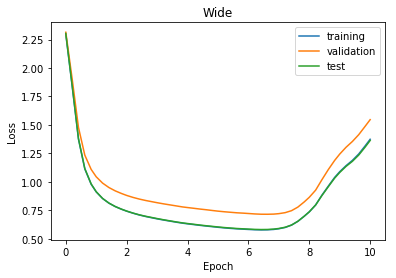

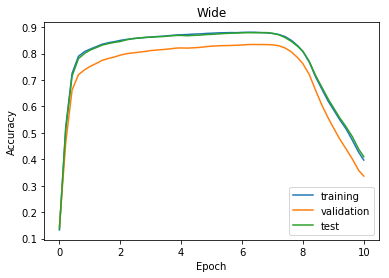

In [12]:
report(result_wide, 'Wide')

### Number of Hidden Layers

In [13]:
%%time
d_in, d_old, d_out = sizes
# Solve the new dimension
d_sum = d_in + d_out
d_new = int((np.sqrt(d_sum ** 2 + 4 * d_sum * d_old) - d_sum) / 2)
print('New hidden layer dimension is', d_new)
sizes_deep = [d_in, d_new, d_new, d_out]
result_deep = trick_train(sizes_deep)

New hidden layer dimension is 59
CPU times: user 1min 6s, sys: 10.1 s, total: 1min 16s
Wall time: 41.5 s


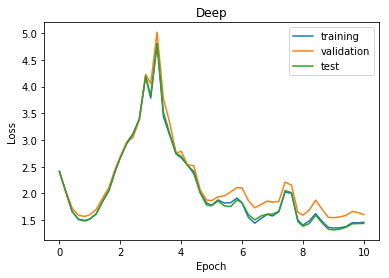

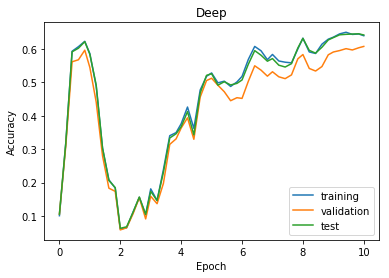

In [14]:
report(result_deep, 'Deep')